In [1]:
import pandas as pd

df_wifi = pd.read_csv('privamov-wifi', sep='\t',nrows=1000000, header=None, names=['id', 'timestamp','wifi'])

In [2]:
df_wifi

,id,timestamp,wifi
0,1,2014-10-06 12:56:50.5,84:a6:c8:a9:c2:d9
1,1,2014-10-06 12:56:50.51,9c:1c:12:24:b4:d1
2,1,2014-10-06 12:56:50.515,9c:1c:12:24:af:31
3,1,2014-10-06 12:56:50.516,9c:1c:12:2b:c3:f1
4,1,2014-10-04 19:43:14.986,20:e5:2a:5b:bf:e0
...,...,...,...
999995,6,2015-01-19 09:51:53.904,c8:d3:a3:06:f6:0e
999996,6,2015-01-19 09:51:53.914,9c:1c:12:2b:b1:59
999997,6,2015-01-19 09:51:53.917,9c:1c:12:2b:b1:58
999998,6,2015-01-19 09:51:53.917,9c:1c:12:24:b4:d0


In [3]:
df_wifi_update=pd.DataFrame({'count' : df_wifi.groupby( [ "wifi", "id"] ).size()}).reset_index()
df_wifi_update

,wifi,id,count
0,00:01:36:26:bf:68,8,4
1,00:01:38:87:cb:e8,1,2
2,00:02:6f:95:7d:ad,6,2
3,00:02:6f:95:7d:af,6,1
4,00:02:6f:9f:2b:ff,8,6
...,...,...,...
45111,fe:ef:00:05:d5:2c,12,2
45112,fe:ef:00:05:d5:2e,12,4
45113,fe:ef:00:05:d5:2f,1,2
45114,fe:ef:00:05:d5:2f,12,2


In [4]:
value_counts = df_wifi_update['wifi'].value_counts()

# solution here
df_val_counts = pd.DataFrame(value_counts)
df_value_counts = df_val_counts.reset_index()
df_value_counts.columns = ['wifi_unique', 'Nb_Id'] 

In [5]:
df_value_counts

,wifi_unique,Nb_Id
0,6c:70:9f:e4:e4:50,18
1,9c:1c:12:24:b4:d1,18
2,9c:1c:12:2b:c3:f1,18
3,9c:1c:12:24:b4:d0,18
4,9c:1c:12:2b:c3:f0,17
...,...,...
36812,16:18:0a:26:8e:e2,1
36813,00:17:33:f4:06:20,1
36814,f4:ca:e5:90:59:19,1
36815,04:a1:51:a1:31:a2,1


In [6]:
for i in range(len(df_wifi_update)):
    if(int(df_value_counts[df_value_counts['wifi_unique'] == df_wifi_update["wifi"][i]]["Nb_Id"]) == 1 ) :
        df_wifi_update=df_wifi_update.drop([i])




    

In [7]:
value_counts = df_wifi_update['wifi'].value_counts()

# solution here
df_val_counts = pd.DataFrame(value_counts)
df_value_counts = df_val_counts.reset_index()
df_value_counts.columns = ['wifi_unique', 'Nb_Id'] 
df_val_counts


,wifi
9c:1c:12:2b:c3:f1,18
9c:1c:12:24:b4:d0,18
9c:1c:12:24:b4:d1,18
6c:70:9f:e4:e4:50,18
9c:1c:12:2b:c3:f0,17
...,...
00:0b:86:85:fe:30,2
40:18:b1:6a:45:54,2
00:24:d4:9d:05:40,2
14:0c:76:8c:15:e3,2


In [8]:
final = pd.DataFrame(columns = ['ID1', 'ID2', 'Nbre','wifi'])

In [9]:
s=0
for wifi in range(len(df_value_counts)):
    element= df_wifi_update[df_wifi_update["wifi"] == df_value_counts['wifi_unique'][wifi]]
    df_val_counts = pd.DataFrame(element)
    df_value_counts_test = df_val_counts.reset_index()
    df_value_counts_test.columns = ['supprimer','wifi','id', 'count'] 
    df_value_counts_test=df_value_counts_test.drop(columns=["supprimer"])
    for i in range(len(df_value_counts_test)):
        j=i+1
        while(j <len(df_value_counts_test)):
            final.loc[s]=[df_value_counts_test["id"][i],df_value_counts_test["id"][j],min(df_value_counts_test["count"][i],df_value_counts_test["count"][j]),df_value_counts_test["wifi"][i]]
            j=j+1
            s+=1

        

In [10]:
final

,ID1,ID2,Nbre,wifi
0,1,2,10,9c:1c:12:2b:c3:f1
1,1,5,13,9c:1c:12:2b:c3:f1
2,1,6,954,9c:1c:12:2b:c3:f1
3,1,7,29,9c:1c:12:2b:c3:f1
4,1,8,17,9c:1c:12:2b:c3:f1
...,...,...,...,...
16844,6,8,2,00:0b:86:85:fe:30
16845,1,2,1,40:18:b1:6a:45:54
16846,1,8,1,00:24:d4:9d:05:40
16847,11,17,4,14:0c:76:8c:15:e3


In [11]:
resultt=pd.DataFrame({'Nbre-repeat' : final.groupby( [ "ID1", "ID2"] ).size()}).reset_index()
result=pd.DataFrame({'Nbre' : final.groupby( [ "ID1", "ID2"] ).sum()['Nbre']}).reset_index()


In [12]:
resultt

,ID1,ID2,Nbre-repeat
0,1,2,1190
1,1,5,43
2,1,6,1374
3,1,7,798
4,1,8,917
...,...,...,...
189,22,24,24
190,22,25,37
191,23,24,19
192,23,25,39


In [13]:
result

,ID1,ID2,Nbre
0,1,2,5833
1,1,5,8762
2,1,6,30806
3,1,7,5776
4,1,8,7929
...,...,...,...
189,22,24,201
190,22,25,277
191,23,24,213
192,23,25,447


In [38]:
!pip install networkx

In [14]:
import networkx as nx
G = nx.Graph()

In [15]:
G = nx.from_pandas_edgelist(result, 'ID1', 'ID2')
df1 = result[['ID1', 'ID2']]

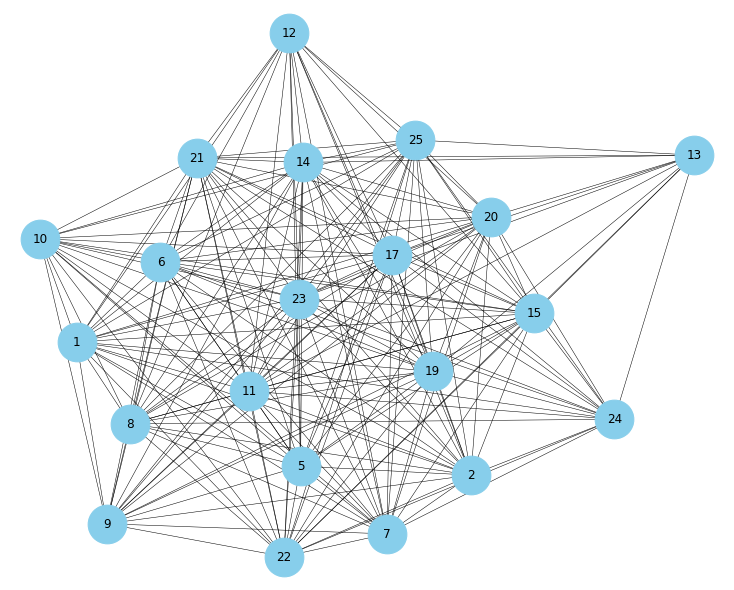

In [23]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

figure(figsize=(10, 8))

nx.draw(G, with_labels=True, node_color='sKYblue', node_size=1500,  width=0.5, edge_cmap=plt.cm.Blues)
plt.savefig("graph_first_algo.jpg",dpi=1000)

In [20]:
plt.savefig("graph.png",dpi=1000)

<Figure size 432x288 with 0 Axes>